# Assignment 2: Linear Regression

#### The problems in this assignment are based on the exercises of Chapter 6 in Data Mining for Business Analytics.

### Scenario: Several new airports have opened in major cities, opening the market for new routes (a route refers to a pair of airports), and Southwest has not announced whether it will cover routes to/from these cities. In order to price flights on these routes, a major airline collected information on 638 air routes in the United States.

### Some factors are known about these new routes: the distance traveled, demographics of the city where the new airport is located, and whether this city is a vacation destination. Other factors are yet unknown (e.g., the number of passengers who will travel this route). A major unknown factor is whether Southwest or another discount airline will travel on these new routes. Southwest’s strategy (point-to-point routes covering only major cities, use of secondary airports, standardized fleet, low fares) has been very different from the model followed by the older and bigger airlines (hub-and-spoke model extending to even smaller cities, presence in primary airports, variety in fleet, pursuit of high-end business travelers).

In [1]:
# Import required functionality for this assignment
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


no display found. Using non-interactive Agg backend


### Question 1 (3 points) Explore the relationship between the numerical predictors and the response (FARE) by creating a correlation table and by examining scatterplots between FARE and those predictors. What appears to be the best single predictor of FARE?

In [2]:
# Read in data
airfares_df = pd.read_csv('dmba\Airfares.csv')
airfares_df.head()


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [3]:
airfares_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [4]:
numerical_cols = ['FARE','COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 
              'DISTANCE', 'PAX']
airfares_numerical = airfares_df[numerical_cols]


In [5]:
airfares_numerical.head()

,FARE,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX
0,64.11,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864
1,174.47,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820
2,207.76,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452
3,85.47,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144
4,85.47,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144


## Correlation Table of numerical predictors and the response (FARE)

In [6]:
airfares_numerical.corr(method='pearson')

,FARE,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX
FARE,1.000000,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705
COUPON,0.496537,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974
NEW,0.091730,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495
HI,0.025195,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961
S_INCOME,0.209135,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197
E_INCOME,0.326092,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961
S_POP,0.145097,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611
E_POP,0.285043,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698
DISTANCE,0.670016,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482
PAX,-0.090705,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000


### Visual Representation of the Correlation Matrix

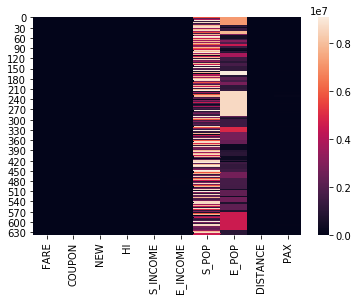

In [7]:
sns.heatmap(airfares_numerical)

## Scatterplot Matrix between FARE and numerical predictors.

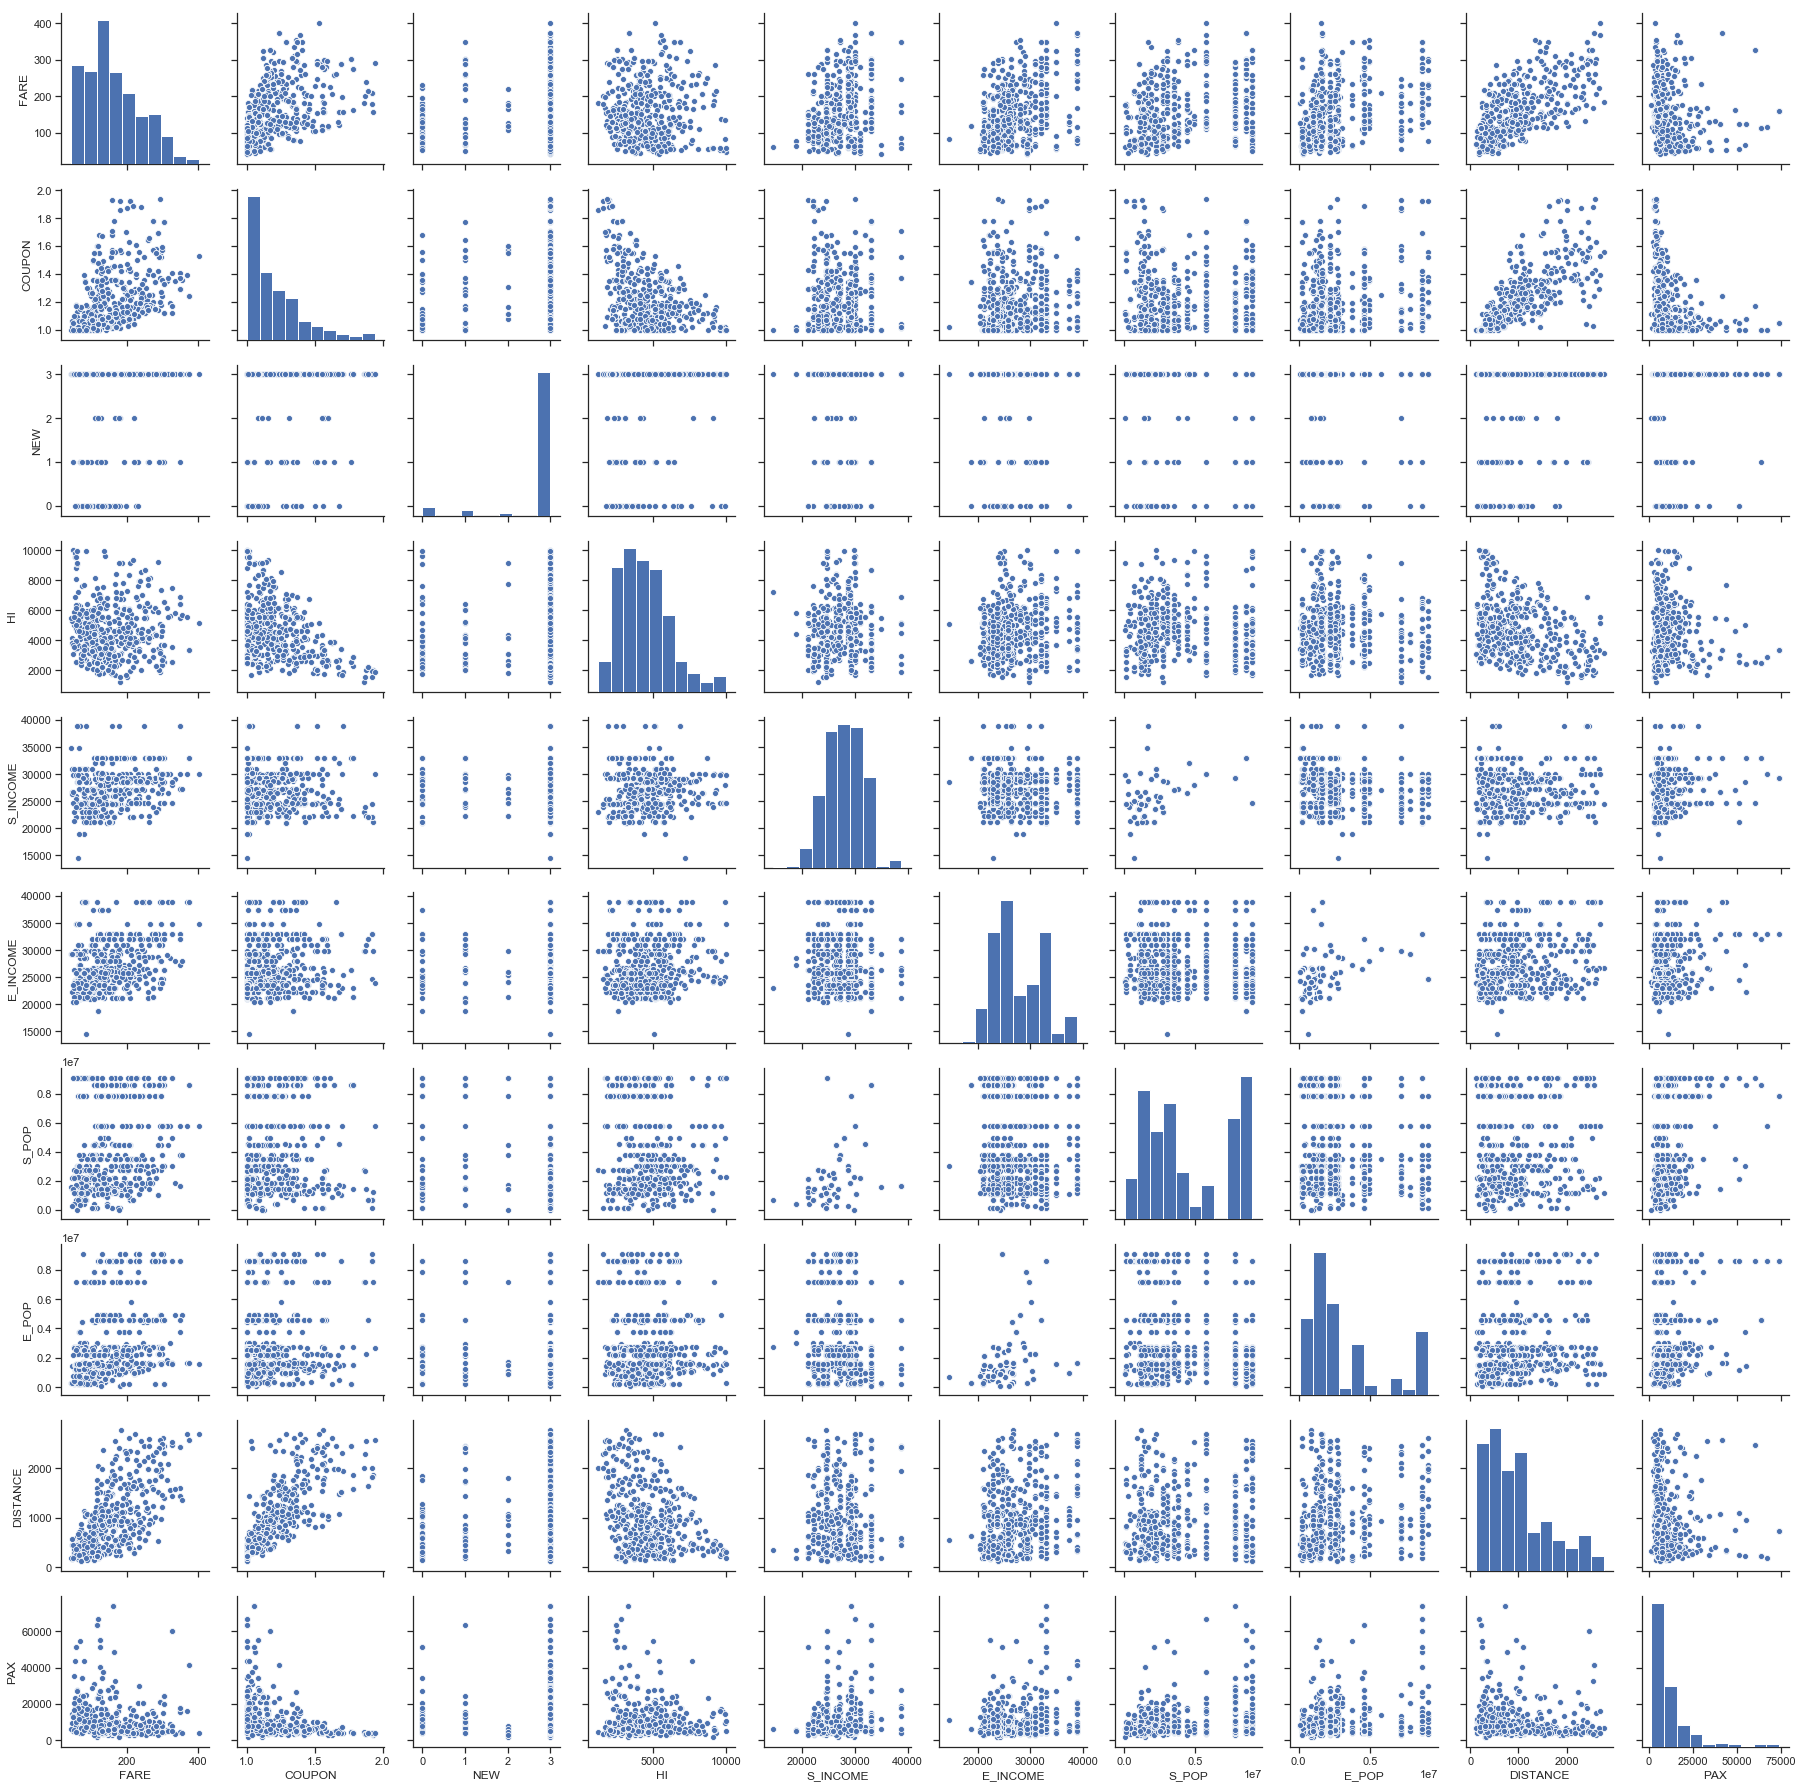

In [8]:
sns.set(style='ticks')
sns.pairplot(airfares_numerical)

### Based on the correlation matrix and the scatterplot matrix, DISTANCE appears to be the best single predictor of FARE.

### Question 2 (5 points) Find a linear regression model for predicting the average fare on a new route. Interpret the output. Compare the model to a second linear regression model trained using standardized data.

In [9]:
predictors = ['COUPON','NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
             'PAX', 'DISTANCE']
outcome = 'FARE'

airfares_df['VACATION'] = [1 if v == 'Yes' else 0 for v in airfares_df['VACATION']]
airfares_df['SW'] = [1 if v == 'Yes' else 0 for v in airfares_df['SW']]
airfares_df['SLOT'] = [1 if v == 'Free' else 0 for v in airfares_df['SLOT']]
airfares_df['GATE'] = [1 if v == 'Free' else 0 for v in airfares_df['GATE']]

airfares_df.tail()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
633,LGA,New York/Newark NY,*,West Palm Beach FL,1.08,3,1,0,2216.70,32991.0,37375.0,8621121,991717,0,1,1030,34324,129.63
634,EWR,New York/Newark NY,*,West Palm Beach FL,1.08,0,1,0,2216.70,32991.0,37375.0,8621121,991717,1,0,1030,34324,129.63
635,*,Philadelphia/Camden PA,*,West Palm Beach FL,1.17,3,1,0,6797.80,27994.0,37375.0,4948339,991717,1,1,960,6016,124.87
636,IAD,Washington DC,*,West Palm Beach FL,1.28,3,1,0,5566.43,31981.0,37375.0,4549784,991717,1,1,858,4877,129.62
637,DCA,Washington DC,*,West Palm Beach FL,1.28,3,1,0,5566.43,31981.0,37375.0,4549784,991717,0,1,858,4877,129.62


In [10]:
# partition data
X = pd.get_dummies(airfares_df[predictors], drop_first='TRUE')
y = airfares_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fare_lm1 = LinearRegression()
fare_lm1.fit(train_X, train_y)

# print coefficients
print('intercept ', fare_lm1.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': fare_lm1.coef_}))

# print performance measures
regressionSummary(train_y, fare_lm1.predict(train_X))

intercept  52.972843175570716
   Predictor  coefficient
0     COUPON   -11.744039
1        NEW    -2.508229
2   VACATION   -35.206099
3         SW   -42.157140
4         HI     0.006876
5   S_INCOME     0.000626
6   E_INCOME     0.001247
7      S_POP     0.000004
8      E_POP     0.000004
9       SLOT   -13.533183
10      GATE   -21.185849
11       PAX    -0.000916
12  DISTANCE     0.077822

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849


In [11]:
# partition and standardize data
X = pd.get_dummies(airfares_df[predictors], drop_first='TRUE')
y = airfares_df[outcome]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

train_X, valid_X, train_y, valid_y = train_test_split(rescaledX, y, test_size=0.4, random_state=1)

fare_lm2 = LinearRegression()
fare_lm2.fit(train_X, train_y)

# print coefficients
print('intercept ', fare_lm2.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': fare_lm2.coef_}))

# print performance measures
regressionSummary(train_y, fare_lm2.predict(train_X))


intercept  161.60818913860805
   Predictor  coefficient
0     COUPON    -2.391802
1        NEW    -1.905883
2   VACATION   -15.564838
3         SW   -19.392902
4         HI    11.846018
5   S_INCOME     2.248345
6   E_INCOME     5.746052
7      S_POP    11.783719
8      E_POP    12.091699
9       SLOT    -6.110790
10      GATE    -8.383350
11       PAX   -12.087574
12  DISTANCE    50.252424

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849


C:\Users\jenkij\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jenkij\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Comparing the first model to a second linear regression model trained using standardized data I note that the intercept of the first model (3.6750129758864034) is much smaller than the intercept of the second model (3.6750129758864034).  Also, the coefficient for DISTANCE of model 1 (0.074294) is much smaller than the model 2 (47.974162).

### Question 3 (5 points) Using the first model, compute the predicted fare for the following route:
#### COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = 28,760, E_INCOME = 27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12782, DISTANCE = 1976 miles.


In [12]:
new_route_df = pd.DataFrame(
    [[ 1.202, 3, 'No', 'No', 4442.141, 28760, 27664, 4557004, 3195503, 'Free', 'Free', 12782, 1976]],
    columns=['COUPON','NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
             'PAX', 'DISTANCE'])
new_route_df['VACATION'] = [1 if v == 'Yes' else 0 for v in new_route_df['VACATION']]
new_route_df['SW'] = [1 if v == 'Yes' else 0 for v in new_route_df['SW']]
new_route_df['SLOT'] = [1 if v == 'Free' else 0 for v in new_route_df['SLOT']]
new_route_df['GATE'] = [1 if v == 'Free' else 0 for v in new_route_df['GATE']]
new_route_df

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,PAX,DISTANCE
0,1.202,3,0,0,4442.141,28760,27664,4557004,3195503,1,1,12782,1976


In [13]:
y_pred = fare_lm1.predict(new_route_df)
y_pred

array([253.6962435])

### The predicted fare for the new route is 253.70

### Based on real-time data, the variables that would actually be available in a real-world implementation of this model for predicting average fare between airports would be DISTANCE, COUPON, VACATION, SW, SLOT, GATE.